# About BERT


In [ ]:
!pip install datasets transformers tokenizers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00


## Немного теории

Важные даты:
- 2013 год - появление Word2Vec
- 2017 год - публикация "Attention is all you need" [1] с представлением Трансформеров и механизма внимания (но идея внимания сильно старше, чем эта статья)
- 2018 - 2019 год - представлен BERT [2] (в 2018 - на сайте архива, в 2019 - на NAACL)

**2013 - 2017 год: что здесь было?**

В отличие от предшественников, BERT (как представитель семейства Трансформеров) решает несколько проблем:
- Он позволяет получаеть контекстные эмбеддинги, что выгодно отличает его от word2vec & Co
- Внутри себя он умеет понимать, какие слова более важны друг для друга (за это отвечает механизм внимания), что позволяет в определенной степени решить проблемы с памятью, свойственные рекурентным моделям

Обучается BERT обычно на две задачи:
- Masked Language Modelling (MLM) - предсказание токена, закрытого маской
- Next Sentence Prediction (NSP) - определение, является ли второе предложение продолжением первого

Другие Трансформеры часто обучают на задачу Causal Language Modelling (CLM) - предсказание следующего токена по контексту

Механизм внимания
- Абстрактно: это часть модели, которая каждому входному токену ставит в соотвествие вектор, описывающий важность всех слов входной последовательночти
- Более конкретно: перемножение трех матриц (запрос, ключ и значение), полученных из статических эмбеддингов (да-да, они все еще с нами!)

Целый трансформер
- Обычно энкодер + декодер: две половинки модели
- Но BERT - это только энкодер, а GPT (все его версии) - это только декодер. Разница, по большей части, в том, куда смотрит внимание: в энкодере внимание может смотреть на все предложение, так как он должен уметь его превратить в эмбеддинги; в декодере - только на предшествующие токены, так как декодер чаще всего про генерацию

|Encoder|Decoder|Encoder-Decoder|
|--|--|--|
|BERT|GPT1, 2, 3, 4|T5|
|RoBERTa|ChatGPT|Bart|
|ALBERT|PaLM|Pegasus|
|ELECTRA|LLaMA|ProphetNet|




Источники:
1. Vaswani A. et al. Attention is all you need //Advances in neural information processing systems. – 2017. – Т. 30.
2. Devlin J. et al. BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding //Proceedings of NAACL-HLT. – 2019. – С. 4171-4186.

[Очень хорошая статья про работу Трансформера](https://habr.com/ru/articles/486358/)

## Hugging Face

[Hugging Face](https://huggingface.co/) - огромный агрегатор всего, связанного с DL моделями

Там есть:
- Датасеты для различных задач (NLP, CV, STT, TTS etc.)
- Модели, обученные на этих датасетах
- Множество связанных библиотек для работы с моделями

Если не знаете, какую модель использовать, то лучше начать с HF

Библиотеки, которые интересны нам, как лингвистам:
- datasets
- transformers
- tokenizers
- реже evaluate

Еще иногда полезно посмотреть [Tasks](https://huggingface.co/tasks), особенно в образовательных целях или если вы не знаете, как правильно реализовать обучение на конкретную задачу

И еще у них есть неплохой [курс по NLP](https://huggingface.co/learn/nlp-course/chapter0/1?fw=pt)

## Datasets

Cначала быстро посмотрим на датасеты. У них достаточно простой интерфейс, однако есть несколько нюансов.

В любом случае, сначала датасет надо прочитать. Сделать это можно несколькими способами, в том числе:
- прочитать датасет целиком
- прочитать конкретный сплит (причем здесь можно еще и срез по элементам указать)

In [ ]:
from datasets import load_dataset

Читаем целый датасет

In [ ]:
dataset = load_dataset("blinoff/kinopoisk")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['content', 'title', 'grade3', 'movie_name', 'part', 'review_id', 'author', 'date', 'grade10', 'Idx'],
        num_rows: 36591
    })
    validation: Dataset({
        features: ['content', 'title', 'grade3', 'movie_name', 'part', 'review_id', 'author', 'date', 'grade10', 'Idx'],
        num_rows: 36591
    })
})

Читаем кусочек датасета

In [ ]:
small_dataset = load_dataset("blinoff/kinopoisk", split='train[10:20]')

In [ ]:
small_dataset

Dataset({
    features: ['content', 'title', 'grade3', 'movie_name', 'part', 'review_id', 'author', 'date', 'grade10', 'Idx'],
    num_rows: 10
})

Самое очевидное, что можно дальше захотеть от датасета, это взять по нему конкретный срез (особенно, если изначально читали его целиком). Теоретически, датасет позволяет взаимодействие как со словарями и списками, однако тут есть одна беда: он возвращает словарь, а не датасет меньшего размера.

In [ ]:
dataset['train'][1:3]

{'content': ['\nАдриано Челентано продолжает радовать нас\xa0своими работами в\xa0жизни кино и\xa0в сфере музыкального творчества. Новая захватывающая, интересная и\xa0талантливо исполненная история покажет, какие бывают денежные махинации в\xa0мире, чего стоит связаться с\xa0оригинальным, находчивым человеком, которого зовут Феникс, как\xa0заполучить приличную денежную сумму, чтобы жить всю\xa0оставшуюся жизнь в\xa0роскоши и\xa0в свое удовольствие.\n\nБлестяще смешной фильм, рассчитанный на\xa0широкую аудиторию, комедия, от\xa0которой получаешь наслаждение, где\xa0проникаешься игрой актеров и\xa0чувствуешь их\xa0азартный вкус на\xa0вещи, когда хочется лечь на\xa0кровать, не\xa0думать ни\xa0о чем, а\xa0лишь наблюдать за\xa0игрой потрясающих актеров, со\xa0временем только выросшем в\xa0профессиональном аспекте.\n\nДа, добрая, немного наивная картина, не\xa0скучная, со\xa0вкусом, с\xa0оригинальными, хорошо продуманными моментами, некоторые эпизоды заслуживают отдельной похвалы, потому чт

Чтобы получить датасет меньшего размера, можно использовать `select`

In [ ]:
dataset['train'].select([1, 2])

Dataset({
    features: ['content', 'title', 'grade3', 'movie_name', 'part', 'review_id', 'author', 'date', 'grade10', 'Idx'],
    num_rows: 2
})

Еще есть `filter`, который позволяет взять кусочек датасета по условию

In [ ]:
dataset.filter(lambda item: float(item['grade10']) > 9)

Filter:   0%|          | 0/36591 [00:00<?, ? examples/s]

Filter:   0%|          | 0/36591 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['content', 'title', 'grade3', 'movie_name', 'part', 'review_id', 'author', 'date', 'grade10', 'Idx'],
        num_rows: 13487
    })
    validation: Dataset({
        features: ['content', 'title', 'grade3', 'movie_name', 'part', 'review_id', 'author', 'date', 'grade10', 'Idx'],
        num_rows: 13487
    })
})

Еще удобная функция аналогична той, что есть в sklearn, и позволяет делить датасет на сплиты

In [ ]:
dataset['train'].train_test_split(test_size=0.1)

DatasetDict({
    train: Dataset({
        features: ['content', 'title', 'grade3', 'movie_name', 'part', 'review_id', 'author', 'date', 'grade10', 'Idx'],
        num_rows: 32931
    })
    test: Dataset({
        features: ['content', 'title', 'grade3', 'movie_name', 'part', 'review_id', 'author', 'date', 'grade10', 'Idx'],
        num_rows: 3660
    })
})

## Tokenizer

In [ ]:
import seaborn as sns
from tqdm.notebook import tqdm

import torch
from torch.utils.data import DataLoader

from transformers import AutoTokenizer, AutoModel

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Токенайзер для моделей вроде BERT также обучается, поэтому важно брать тот, который подходит к вашей модели. Обычно они идут парой под одним названием.

Чаще всего для BERT используется BPE (Byte Pair Encoding) токенайзер, суть которого заключаестя в токенизации на кусочки слов. Учится он следующим образом:
0. изначально словарь состоит из отдельных символов
1. считаем частотность сочетаний
2. потом самая частотная комбинация токенов помещается в словарь как отдельный токен
3. Повторяем пункты 1-2, пока размер словаря не станет заданного размера (это гиперпараметр, который задается при обучении)

Такое обучение позвоялет избежать проблемы с неизвестными словами: даже если это что-то совсем маргинальное, токенайзер просто в крайнем случае поделит на отдельные символы. Плюс, для совсем новых символов обычно есть специальный токен, обозначающий неизвестные символы (но чаще всего это редкая ситуация).


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

У токенайзера есть три (может, и больше) варианта использования:
- метод `tokenize`
- метод `encode`
- вызов токенайзера как callable объекта

In [ ]:
tokenizer.tokenize('Что ты здесь делаешь?')

['Что', 'ты', 'здесь', 'дела', '##ешь', '?']

In [ ]:
tokenizer.encode('Что ты здесь делаешь?')

[101, 13302, 4609, 10378, 11725, 26318, 166, 102]

In [ ]:
tokenizer.decode(tokenizer.encode('Что ты здесь делаешь?'))

'[CLS] Что ты здесь делаешь? [SEP]'

In [ ]:
tokenizer('Что ты здесь делаешь?')

{'input_ids': [101, 13302, 4609, 10378, 11725, 26318, 166, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

В контексте токенизации для дальнейшего использования при векторизации лучше всего использовать последний вариант. У токенайзера как функции есть множество параметров. Часть из них лучше/можно не трогать, но некоторые нужно знать:
- `return_tensors` - повзволяет выбрать, какой тип данных должен быть на выходе. Есть вариант `tf` (`tensorflow`), `pt` (`pytorch`) и  `np` (`numpy`). Если не указано, то вернет просто списки
- `padding` - задает, нужен ли и какой паддинг (дополнение) в инпуте. Умеет дополнять: до самой большой длины в инпуте или до максимальной длины, указанной в параметре
- `truncation` - нужно ли обрезать последовательность
- `max_length` - параметр максимальной длины последовательности


In [ ]:
text1 = 'Что ты здесь делаешь?'
text2 = 'Сижу на дереве.'

In [ ]:
tokenizer(text1, return_tensors='pt', max_length=16)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


{'input_ids': tensor([[  101, 13302,  4609, 10378, 11725, 26318,   166,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
tokenizer(text1, padding='max_length', truncation=True, return_tensors='pt',
          max_length=16)

{'input_ids': tensor([[  101, 13302,  4609, 10378, 11725, 26318,   166,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}

А еще токенайзер умеет правильно обрабатывать пары текстов (полезно для задач типа NLI) или работать сразу со списком текстов

In [ ]:
tokenizer(text1, text2, padding='max_length', truncation=True, return_tensors='pt',
          max_length=16)

{'input_ids': tensor([[  101, 13302,  4609, 10378, 11725, 26318,   166,   102, 18764, 17847,
          1469, 62140,   132,   102,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])}

In [ ]:
tokenizer.decode(tokenizer.encode(text1, text2))

'[CLS] Что ты здесь делаешь? [SEP] Сижу на дереве. [SEP]'

In [ ]:
tokenizer([text1, text2], padding='max_length', truncation=True, return_tensors='pt',
          max_length=16)

{'input_ids': tensor([[  101, 13302,  4609, 10378, 11725, 26318,   166,   102,     0,     0,
             0,     0,     0,     0,     0,     0],
        [  101, 18764, 17847,  1469, 62140,   132,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}

## Model

С моделью история та же, что и с токенайзером: ее сначала надо загрузить. Это может занять какое-то время, так как можель все-таки тяжелее.

In [ ]:
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Дальше можно посмотреть, из чего она состоит

In [ ]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
 

Теперь посмотрим на то, как этим пользоваться:
1. Сначала токенизируем последовательность
2. Потом всё! полученное передаем в модель, вызывая ее как функцию

In [ ]:
toks = tokenizer(text1, padding='max_length', truncation=True, return_tensors='pt',
          max_length=16)
with torch.no_grad():
    model_output = model(**{k: v.to(model.device) for k, v in toks.items()},
                         output_attentions=True,
                         output_hidden_states=True)

Вообще, при большом желании, можно получить результат от работы только части модели, но для этого обычно нужна какая-то очень специфическая потребность.

Например, посмотрим на статические эмбеддинги из Берта. Теоретически, здесь можно изучать всякие интересные закономерности: как эти эмбеддинги связаны с тем, что в итоге оказывается в контексте (особенно в случае с задачей WSI) или работаю ли для них те же правила, что и для эмбеддингов из word2vec (пропорции и т.д.). Но важно, что здесь придется учесть привычку токенайзера делить слова на кусочки.

In [ ]:
model.embeddings.word_embeddings(toks['input_ids'])

tensor([[[-0.0157,  0.0058,  0.0008,  ...,  0.0132, -0.0251, -0.0011],
         [-0.0389,  0.0253,  0.0235,  ...,  0.0025, -0.0004, -0.0316],
         [ 0.0031,  0.0281, -0.0719,  ..., -0.0359, -0.0867,  0.0383],
         ...,
         [ 0.0041,  0.0138, -0.0080,  ...,  0.0170,  0.0175,  0.0226],
         [ 0.0041,  0.0138, -0.0080,  ...,  0.0170,  0.0175,  0.0226],
         [ 0.0041,  0.0138, -0.0080,  ...,  0.0170,  0.0175,  0.0226]]],
       grad_fn=<EmbeddingBackward0>)

Теперь посмотрим, что из себя представляет выдача всей модели

In [ ]:
type(model_output)

transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions

In [ ]:
model_output.keys()

odict_keys(['last_hidden_state', 'pooler_output', 'hidden_states', 'attentions'])

In [ ]:
model_output.last_hidden_state, model_output.last_hidden_state.shape

(tensor([[[-0.2554,  0.0835,  0.0891,  ...,  0.1840, -0.2018, -0.1841],
          [-0.6411, -0.1555,  0.1629,  ...,  0.8837, -0.4442, -0.1713],
          [-0.2816, -0.3796,  0.4058,  ...,  0.8235, -0.5796,  0.1911],
          ...,
          [-0.5254, -0.1365,  0.4963,  ...,  0.5846, -0.3498, -0.5520],
          [-0.5123, -0.1249,  0.4290,  ...,  0.5830, -0.4738, -0.5583],
          [-0.6484, -0.2304,  0.5001,  ...,  0.6024, -0.4024, -0.5491]]]),
 torch.Size([1, 16, 768]))

In [ ]:
model_output.hidden_states[1], model_output.hidden_states[0].shape, len(model_output.hidden_states)

(tensor([[[ 0.5048,  0.1821,  0.2711,  ..., -0.2193, -0.4851,  0.3682],
          [-1.2503,  0.2730,  0.8037,  ...,  1.0978, -0.5753, -1.0308],
          [ 0.4937,  0.1345, -1.3058,  ..., -0.0158, -2.2283,  1.2935],
          ...,
          [ 0.2993,  0.2103,  0.2959,  ..., -0.1225,  0.0124,  0.4592],
          [ 0.3090,  0.1888,  0.4228,  ..., -0.1918, -0.0438,  0.4677],
          [ 0.3571,  0.0330,  0.3362,  ..., -0.1648, -0.0997,  0.3207]]]),
 torch.Size([1, 16, 768]),
 13)

Отдельно можно посмотреть на матрицы внимания. И даже построить для них график

In [ ]:
model_output.attentions[0], model_output.attentions[0].shape, len(model_output.attentions)

(tensor([[[[0.3414, 0.0504, 0.0379,  ..., 0.0000, 0.0000, 0.0000],
           [0.0587, 0.0799, 0.0616,  ..., 0.0000, 0.0000, 0.0000],
           [0.1285, 0.0691, 0.2221,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.1626, 0.1345, 0.0596,  ..., 0.0000, 0.0000, 0.0000],
           [0.1668, 0.1220, 0.0558,  ..., 0.0000, 0.0000, 0.0000],
           [0.1547, 0.1348, 0.0473,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.2794, 0.0937, 0.0398,  ..., 0.0000, 0.0000, 0.0000],
           [0.0940, 0.1348, 0.1076,  ..., 0.0000, 0.0000, 0.0000],
           [0.0118, 0.2121, 0.1965,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.1929, 0.0338, 0.0768,  ..., 0.0000, 0.0000, 0.0000],
           [0.1468, 0.0317, 0.0794,  ..., 0.0000, 0.0000, 0.0000],
           [0.1436, 0.0402, 0.0881,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.1824, 0.0579, 0.1549,  ..., 0.0000, 0.0000, 0.0000],
           [0.0422, 0.1223, 0.1653,  ..., 0.0000, 0.0000, 0.0000],
           [0.1017, 0.14

<Axes: >

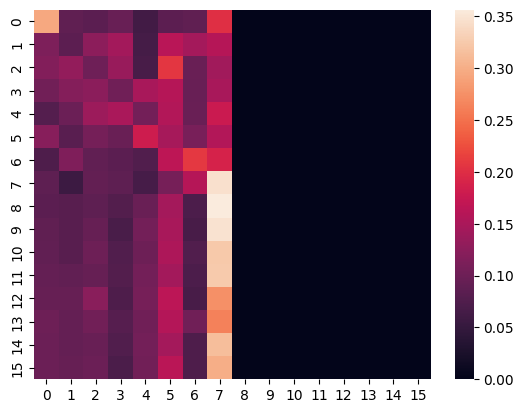

In [ ]:
sns.heatmap(torch.mean(model_output.attentions[0], dim=1).squeeze())

Еще одна полезная возможность (к сожалению, доступная большинству из нас только в колабе) - это пененос модели на гпу. Для этого нужно, чтобы в среде была настроена видеокарта.

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device_cuda = torch.device("cuda")
device_cpu = torch.device("cpu")

In [ ]:
texts = dataset['train'].select(range(50))['content']
toks = tokenizer(texts, padding='max_length', truncation=True, return_tensors='pt',
    max_length=256)

In [ ]:
model = model.to(device_cpu)

In [ ]:
%%timeit
with torch.no_grad():
    model_output = model(**{k: v.to(model.device) for k, v in toks.items()})

KeyboardInterrupt: 

Важно, что для работы на зпу нужно перенести туда все, что будет использоваться при вычислениях: и модель, и результаты токенизации

In [ ]:
model = model.to(device_cuda)

In [ ]:
%%timeit
with torch.no_grad():
    model_output = model(**{k: v.to(model.device) for k, v in toks.items()})

The slowest run took 37.44 times longer than the fastest. This could mean that an intermediate result is being cached.
546 ms ± 216 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Теперь давайте попробуем решить какую-нибудь задачу. Будем предсказывать, какую тональность имеет отзыв

In [ ]:
data = dataset['train'].remove_columns(['title', 'movie_name', 'part', 'review_id', 'author', 'date', 'grade10', 'Idx'])
data

Dataset({
    features: ['content', 'grade3'],
    num_rows: 36591
})

Векторизуем датасет

In [ ]:
def vectorize_dataset_and_return(data):
    res = []
    for batch in tqdm(data):
        toks = tokenizer(batch['content'], padding='max_length', truncation=True, return_tensors='pt',
          max_length=64)
        with torch.no_grad():
            model_output = model(**{k: v.to(model.device) for k, v in toks.items()})
        res.append(torch.mean(model_output.last_hidden_state, dim=1))
    res = torch.vstack(res)
    return res.detach().cpu().numpy()

In [ ]:
dl = DataLoader(data, batch_size=256, shuffle=False,
                drop_last=False)
vecs = vectorize_dataset_and_return(dl)
vecs.shape

  0%|          | 0/143 [00:00<?, ?it/s]

(36591, 768)

Переведем метки в числа

In [ ]:
le = LabelEncoder()
le.fit(data['grade3'])
lbl = le.transform(data['grade3'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(vecs, lbl, test_size=0.33, random_state=42)

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300, verbose=1)
clf.fit(x_train, y_train)

Iteration 1, loss = 0.65811023
Iteration 2, loss = 0.61619026
Iteration 3, loss = 0.60552265
Iteration 4, loss = 0.59303057
Iteration 5, loss = 0.58720754
Iteration 6, loss = 0.57673686
Iteration 7, loss = 0.56573920
Iteration 8, loss = 0.55950501
Iteration 9, loss = 0.54358035
Iteration 10, loss = 0.53154394
Iteration 11, loss = 0.52004153
Iteration 12, loss = 0.50796223
Iteration 13, loss = 0.49734483
Iteration 14, loss = 0.48300944
Iteration 15, loss = 0.46293388
Iteration 16, loss = 0.44580398
Iteration 17, loss = 0.43400632
Iteration 18, loss = 0.41890236
Iteration 19, loss = 0.40113827
Iteration 20, loss = 0.38810165
Iteration 21, loss = 0.37397403
Iteration 22, loss = 0.35961624
Iteration 23, loss = 0.34172500
Iteration 24, loss = 0.32799763
Iteration 25, loss = 0.31726365
Iteration 26, loss = 0.30685702
Iteration 27, loss = 0.29363436
Iteration 28, loss = 0.28011414
Iteration 29, loss = 0.26822660
Iteration 30, loss = 0.25720406
Iteration 31, loss = 0.24856143
Iteration 32, los

MLPClassifier(max_iter=300, random_state=1, verbose=1)

In [ ]:
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

In [ ]:
crep = classification_report(y_train, train_pred, target_names=le.classes_)
print(crep)

              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00      3148
        Good       1.00      1.00      1.00     18332
     Neutral       1.00      1.00      1.00      3035

    accuracy                           1.00     24515
   macro avg       1.00      1.00      1.00     24515
weighted avg       1.00      1.00      1.00     24515



In [ ]:
crep = classification_report(y_test, test_pred, target_names=le.classes_)
print(crep)

              precision    recall  f1-score   support

         Bad       0.42      0.38      0.40      1603
        Good       0.81      0.84      0.83      8932
     Neutral       0.19      0.16      0.17      1541

    accuracy                           0.69     12076
   macro avg       0.47      0.46      0.47     12076
weighted avg       0.68      0.69      0.69     12076



## PyTorch?

In [ ]:
!pip install tqdm boto3 requests regex sentencepiece sacremoses -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.1 MB/s eta 0:00:00


Если вдруг вы по какой-то причине испытывыете неприязнь к HF, то в pytorch есть интерфейс для загрузки предобученных моделей с HF. Однако весь интерфейс внутри такой же и зависимости тоже такие же. Только список моделей сильно меньше.

In [ ]:
tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-multilingual-cased')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/huggingface/pytorch-transformers/zipball/main" to /root/.cache/torch/hub/main.zip


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [ ]:
tokenizer(text1)

{'input_ids': [101, 85904, 79141, 27377, 25195, 31751, 10851, 136, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-multilingual-cased')

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [ ]:
outp = model(**tokenizer(text1, return_tensors='pt'))
type(outp)

transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions

Зато, в отличие от HF, в pytorch есть возможность собирать полностью свои архитектуры, которые потом обучать. Причем это можно делать на разном уровне детализации:
- в pytorch есть как `nn.Transformer`, позволяющий просто перечислить кол-во слоев и получить модель,
- так и `nn.TransformerEncoder` с `nn.TransformerEncoderLayer` и `nn.TransformerDecoder` с `nn.TransformerDecoderLayer`, позволяющие собрать Трансформер по частям
- отдельно есть `nn.MultiheadAttention`, который реализует сам механизм внимания